# Modeling Off-Axis Seamounts; Expediting insight into near-ridge mantle heterogeneity
- Part Two -
- Methods libraries datasets visualizations for project
#### By: Molly Anderson

### I. Problem Statement 
#### In an age where seeing the unseen is commonplace, scientists still have surprisingly few constraints on mantle dynamics beneath our feet. Studies performed at mid-ocean ridges attempt to address this gap in knowledge by examining chemistry of basalts produced at ridge axes where distance to the mantle is minimal (often less than 1 km). Ideally, those basalts are as close to representing the mantle as a geochemist can access. However, at fast-spreading ridges a continuous thermal barrier allows for efficient mixing of mantle material prior to eruption, so materials collected on-axis (the most common site for sampling) only represent an average composition. To probe any heterogeneities in the mantle, ~300 basalt samples were collected from a long seamount chain perpendicular to the fast-spreading East Pacific Rise in an attempt to by-pass homogenization mixing and see into the mantle. 

#### To assess heterogeneity, fractional crystallization, source mixing, and mantle melting models are compared to the 300 basalt samples. However, the stages from inputing parameters into the melting program (alphaMELTs) to producing visualizations of the results are arduous and time-consuming. This results in week-long modeling sessions that are frequently inadequate and need adjusted and re-run. To expedite the melt model results, this study will incorporate the computing power of Python to read the alphaMELTs output results, process the data, feed it into a script which plots the results in real-time without all of the intermediate, time-consuming steps. This will effectively reduce the time required to visualize the results so I can immediately decide which parameters to adjust, quickly adjust those, and automate getting updated results. 

### II. Useful datasets available
- Major elements analyzed on 284 samples, trace elements analyzed on 149 samples, and radiogenic isotopes analyzed on 19 samples
- Spatial data from in-situ collection of the basalts
- High resolution Sentry maps of the seafloor from which samples were collected
- Output from a melting program MELTs which simulates the compositional pathway a melt will take as pressure is decreased and more phases melt into the liquid phase. There are several simulations based on melting different mantle sources and melting mixtures of those mantle sources
- Source compositions of various mantle reservoirs and calculated ratio mixtures of their compositions

In [11]:
Elements = pd.read_csv('Documents/EPR/Code/MajorTrace.csv') #read in csv file of my data using specific directory
Output = pd.read_csv('Documents/EPR/Code/DDMM.csv') #read in csv file of MELTs output (an example for this part of the project)

### III. Methods and Process
* Adjust parameters and input files for the MELTs program in the form of a batch file
* Execute MELTs using an assigned environment and push batch file through MELTs program to run adjusted parameters
* Import the output from MELTs as a table/matrix
* Calculate ratios from the output matrix and put them in new columns in the table (use numpy to create column and calculate)
* Plot and visualize the results of modelling by comparing with the physical data (use matplotlib.pyplot to create plots)

### IV. Libraries

In [7]:
import pandas as pd # standard library for data analysis
import numpy as np # library for scientific computing
import matplotlib.pyplot as plt # library for plotting values and generating visualizations
from subprocess import call # use subprocess call to execute external program MELTs

### V. Visualizations
* The resulting output from MELTs should be a matrix (with headers) of numbers reflecting the compositional changes in a magma with temperature and pressure changes
* I will calculate a few important ratios from the data (i.e. take La and Sm concentrations and normalize them to the mantle and calculate their ratio (La/SmN) and create a column that includes this ratio for each row (aka temperature change or iteration in MELTs)
* Finally, the ratios will be plotted for the model output (values just calculated) and plotted against my data to assess how well the model fits the data. Then I will adjust accordingly

In [15]:
#From sample runs I have done prior to writing this program:
LaSmN_Data = Elements['La.SmN'].values
NbLa_Data = Elements['Nb.La'].values
LaSmN_Model = Output['La/Sm_1D'].values
NbLa_Model = Output['Nb/La_1D'].values

Text(2,0.6,'Depleted Depleted Mantle')

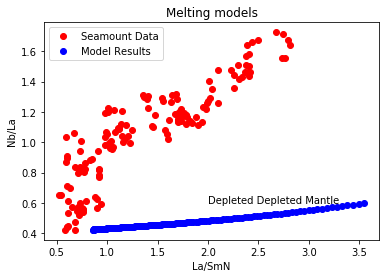

In [23]:
#Plot results of model with my data for comparison
plt.plot(LaSmN_Data, NbLa_Data, 'ro', label = "Seamount Data")
plt.plot(LaSmN_Model, NbLa_Model, 'bo', label = "Model Results")
plt.title('Melting models')
plt.xlabel('La/SmN')
plt.ylabel('Nb/La')
plt.legend()
plt.text(2,0.6, 'Depleted Depleted Mantle')